In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('text.csv')
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [54]:
df.isnull().sum()/df.shape[0]*100

Unnamed: 0    0.0
text          0.0
label         0.0
dtype: float64

<Axes: >

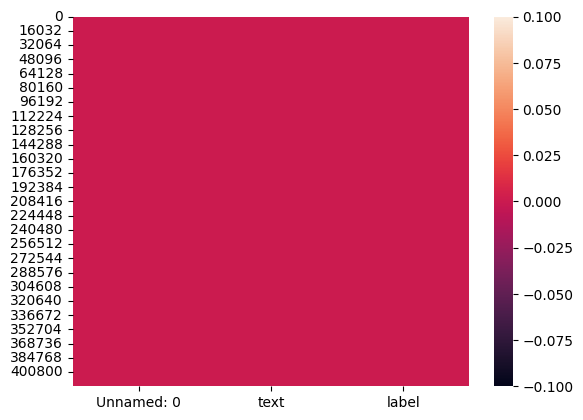

In [55]:
sb.heatmap(df.isnull())

In [56]:
df['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

In [57]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [58]:
from wordcloud import WordCloud

In [60]:
my_cloud=WordCloud(width=1000,height=1000,background_color='black',min_font_size=10)

In [61]:
my_cloud.generate(''.join(df[df['label']==0]['text']))

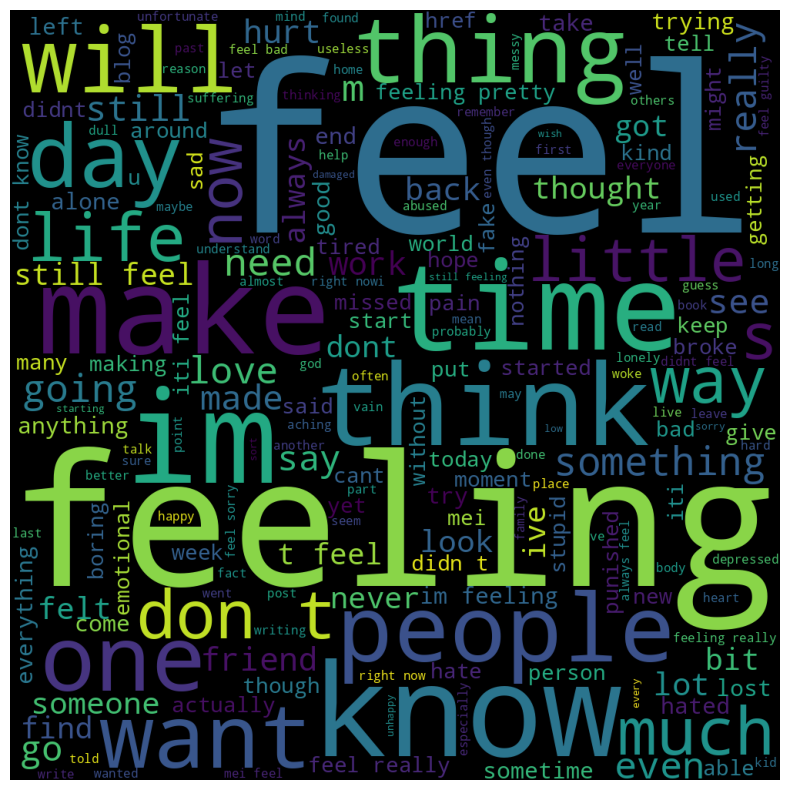

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(my_cloud)
plt.axis('off')
plt.show()

In [63]:
import nltk

In [64]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
from nltk.tokenize import   word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [66]:
def clean_token(text):
  stop=stopwords.words('english')
  punc=list(punctuation)
  bad_tokens=stop+punc
  lemma=WordNetLemmatizer()
  tokens=word_tokenize(text)
  word_tokens=[t for t in tokens if t.isalpha()]
  clean_token=[ lemma.lemmatize(t.lower())for t in word_tokens if t not in bad_tokens]
  return " ".join(clean_token)



In [67]:
df['text']=df['text'].apply(clean_token)

In [68]:
df

,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
...,...,...
416804,feel like telling horny devil find site suited...,2
416805,began realize feeling agitated restless would ...,3
416806,feel curious previous early dawn time seek tro...,5
416807,feel becuase tyranical nature government el sa...,3


In [69]:
x=df['text']
y=df['label']

In [70]:
x.shape

(416809,)

In [71]:
y.shape

(416809,)

In [72]:
sent_len=[]
for sent in df['text']:
  sent_len.append(len(word_tokenize(sent)))

df['sent_len']=sent_len


In [73]:
df

,text,label,sent_len
0,feel really helpless heavy hearted,4,5
1,ive enjoyed able slouch relax unwind frankly n...,0,24
2,gave internship dmrg feeling distraught,4,5
3,dont know feel lost,0,4
4,kindergarten teacher thoroughly weary job take...,4,17
...,...,...,...
416804,feel like telling horny devil find site suited...,2,14
416805,began realize feeling agitated restless would ...,3,9
416806,feel curious previous early dawn time seek tro...,5,8
416807,feel becuase tyranical nature government el sa...,3,22


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [75]:
df['sent_len'].value_counts()

5     37535
6     36982
7     35650
4     35594
8     33469
9     30723
3     28460
10    27785
11    23975
12    20764
13    17699
14    14821
15    12177
16    10327
17     8358
2      7979
18     6939
19     5567
20     4624
21     3821
22     3180
23     2541
24     2036
25     1608
26     1219
27      881
28      615
29      441
30      321
31      173
1       152
32      141
33       97
34       49
35       35
0        16
36       15
39        9
38        8
37        8
40        5
44        2
42        2
45        2
48        1
46        1
41        1
79        1
Name: sent_len, dtype: int64

In [76]:
max(sent_len)

79

In [77]:
df['sent_len'].unique()

array([ 5, 24,  4, 17, 14, 10,  7,  6, 15,  9, 22, 11,  2,  8, 26,  0, 13,
       23, 18,  3, 16, 12, 20, 21, 27, 29, 25, 19, 28, 30, 32,  1, 33, 31,
       34, 35, 48, 36, 38, 44, 39, 40, 37, 46, 42, 45, 41, 79])

In [80]:
np.quantile(sent_len,0.95) #take sentence 95% and 5 secrify

20.0

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,SimpleRNN,GRU
from tensorflow.keras.models import Sequential


In [ ]:
#tokenization
#create object for tokenizer class

In [82]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [83]:
tokenizer.index_word

{1: 'feel',
 2: 'feeling',
 3: 'like',
 4: 'im',
 5: 'really',
 6: 'time',
 7: 'know',
 8: 'get',
 9: 'little',
 10: 'make',
 11: 'people',
 12: 'would',
 13: 'thing',
 14: 'want',
 15: 'one',
 16: 'day',
 17: 'think',
 18: 'still',
 19: 'life',
 20: 'ive',
 21: 'even',
 22: 'much',
 23: 'way',
 24: 'something',
 25: 'love',
 26: 'bit',
 27: 'dont',
 28: 'going',
 29: 'go',
 30: 'could',
 31: 'need',
 32: 'back',
 33: 'say',
 34: 'always',
 35: 'good',
 36: 'pretty',
 37: 'right',
 38: 'see',
 39: 'work',
 40: 'also',
 41: 'year',
 42: 'friend',
 43: 'cant',
 44: 'today',
 45: 'never',
 46: 'help',
 47: 'around',
 48: 'didnt',
 49: 'though',
 50: 'well',
 51: 'made',
 52: 'come',
 53: 'look',
 54: 'got',
 55: 'lot',
 56: 'someone',
 57: 'thought',
 58: 'week',
 59: 'quite',
 60: 'happy',
 61: 'every',
 62: 'take',
 63: 'many',
 64: 'le',
 65: 'felt',
 66: 'find',
 67: 'person',
 68: 'home',
 69: 'anything',
 70: 'sure',
 71: 'kind',
 72: 'last',
 73: 'enough',
 74: 'left',
 75: 'http',

In [32]:
x

0                      feel really helpless heavy hearted
1       ive enjoyed able slouch relax unwind frankly n...
2                 gave internship dmrg feeling distraught
3                                     dont know feel lost
4       kindergarten teacher thoroughly weary job take...
                              ...                        
4041      feel bit nervous anxious know describe actually
4042    feel rich get whatever want want thing make fe...
4043    get feel listless crammed information ive oppo...
4044    feel sympathetic im lot lying god cant imagine...
4045    feel dumb slightest clue lolll p appreciated e...
Name: text, Length: 4046, dtype: object

In [84]:
vocab_len=len(tokenizer.index_word)
vocab_len #unique word

67630

In [85]:
sequences_xtrain=tokenizer.texts_to_sequences(x_train) #change each every word into vector #sentence to vector ((document unique id))
sequences_xtest=tokenizer.texts_to_sequences(x_test)

In [86]:
maxlen=79

In [87]:
X_train_padded = sequence.pad_sequences(sequences_xtrain, maxlen=maxlen)
X_test_padded = sequence.pad_sequences(sequences_xtest, maxlen=maxlen )

In [88]:
X_train_padded

array([[    0,     0,     0, ...,    55,     3,  1917],
       [    0,     0,     0, ...,    99,   725,   312],
       [    0,     0,     0, ...,  4633,  1529,  1665],
       ...,
       [    0,     0,     0, ...,  1560,  1898,  1008],
       [    0,     0,     0, ..., 22533,    12,    35],
       [    0,     0,     0, ...,   926,   280,   278]], dtype=int32)

In [89]:
X_test_padded

array([[    0,     0,     0, ...,   190,  1730,  2487],
       [    0,     0,     0, ...,    15,    52,   513],
       [    0,     0,     0, ...,    23,  2352, 18035],
       ...,
       [    0,     0,     0, ...,  9355,  3409,    19],
       [    0,     0,     0, ...,  1356,  1062,    19],
       [    0,     0,     0, ...,     1,   352,   103]], dtype=int32)

In [90]:
input_Size = np.max(X_train_padded ) +1
input_Size

50000

In [91]:
from keras.layers import Bidirectional, GRU, Embedding, Dropout, BatchNormalization, Dense
from keras.models import Sequential

In [92]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))
# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 50)            2500000   
                                                                 
 dropout_1 (Dropout)         (None, 79, 50)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 79, 240)           123840    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 79, 128)           117504    
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 79, 128)           512       
 chNormalization)                                                
                                                      

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
#create a object of early stopping class
cb=EarlyStopping(
    monitor="val_loss",# val loss validation loss means testing error (testing loss)  # if it is accuary it will stop at accuarcay
    min_delta=0.00001,  #delta min learning rate #lyma value of early stopping #fixing weight and bias
    patience=20, #not stoping immediately
    verbose=1,  #it show me where  the early stopping has taken place
    mode="auto",
    baseline=None, #nueral network decided automatic
    restore_best_weights=False #default true but false it will assign first weights

)

In [94]:
trained_model=model.fit(X_train_padded,y_train,epochs=2,validation_data=(X_test_padded,y_test),batch_size=1500) #mini batch size


Epoch 1/2
223/223 [==============================] - 1850s 8s/step - loss: 0.1190 - accuracy: 0.9353 - val_loss: 0.1187 - val_accuracy: 0.9366
Epoch 2/2
223/223 [==============================] - 1864s 8s/step - loss: 0.0971 - accuracy: 0.9405 - val_loss: 0.0938 - val_accuracy: 0.9376


In [95]:
print("print train_loss and Train_accuarcay",model.evaluate(X_train_padded,y_train))
print("print test_loss and Test_accuarcay",model.evaluate(X_test_padded,y_test))

10421/10421 [==============================] - 792s 76ms/step - loss: 0.0842 - accuracy: 0.9441
print train_loss and Train_accuarcay [0.0842023715376854, 0.9440540671348572]
2606/2606 [==============================] - 196s 75ms/step - loss: 0.0938 - accuracy: 0.9376
print test_loss and Test_accuarcay [0.09379030764102936, 0.937645435333252]


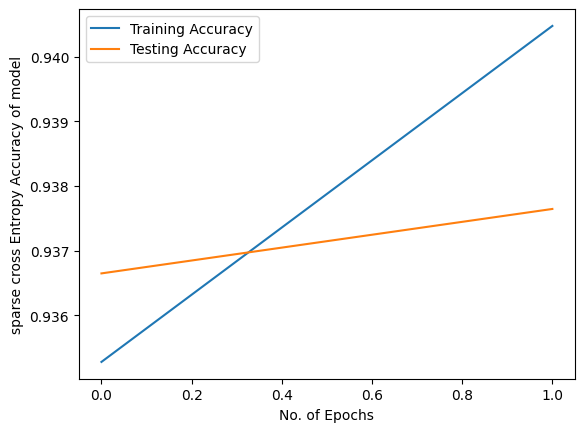

In [96]:
#visulisation of training and testing accuracy
plt.plot(trained_model.history['accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel('sparse cross Entropy Accuracy of model')
plt.legend()
plt.show()

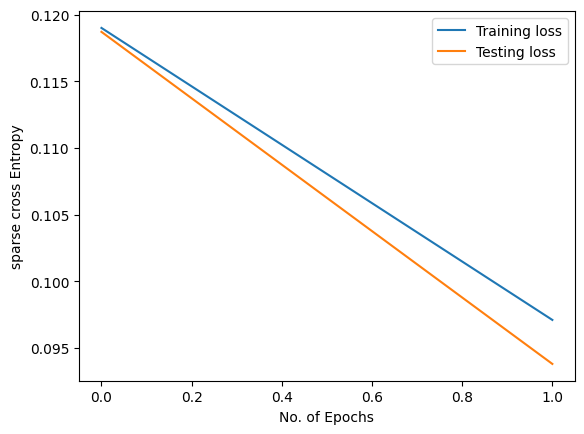

In [97]:
plt.plot(trained_model.history['loss'],label='Training loss')
plt.plot(trained_model.history['val_loss'],label='Testing loss')
plt.xlabel("No. of Epochs")
plt.ylabel('sparse cross Entropy')
plt.legend()
plt.show()

In [98]:
y_pred=model.predict(X_test_padded)
y_pred

2606/2606 [==============================] - 206s 78ms/step


array([[9.9987531e-01, 4.3233555e-05, 4.2221877e-06, 3.4368746e-05,
        4.0090992e-05, 2.8758216e-06],
       [1.6531252e-04, 9.2979775e-05, 3.9476345e-06, 6.5229186e-05,
        9.9940526e-01, 2.6709962e-04],
       [3.1221815e-04, 4.8265426e-04, 9.9898815e-01, 8.6664477e-05,
        4.6447203e-05, 8.3705490e-05],
       ...,
       [2.3846427e-05, 9.9972522e-01, 7.9132675e-05, 9.5504394e-05,
        2.4292161e-05, 5.2082305e-05],
       [1.6640962e-04, 5.5489218e-01, 4.4446060e-01, 9.5990581e-05,
        2.6778533e-05, 3.5801987e-04],
       [9.9986672e-01, 3.1792806e-05, 6.4012484e-06, 4.7806279e-05,
        4.4303655e-05, 2.8971997e-06]], dtype=float32)

In [99]:
#test the model with 30% of data
y_pred1=model.predict(X_test_padded).round(2)
y_pred1
#formula for y_pred=np.exp(-x_test)/np.sum(np.exp(x_test))


2606/2606 [==============================] - 200s 77ms/step


array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.55, 0.44, 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [105]:
#list comphrension is to select those class who got highest probability
y_pred1=[np.argmax(i) for i in y_pred1]
y_pred1

[0,
 4,
 2,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 0,
 3,
 0,
 3,
 0,
 1,
 4,
 1,
 3,
 3,
 1,
 1,
 5,
 1,
 2,
 0,
 1,
 0,
 4,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 3,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 4,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 4,
 4,
 3,
 0,
 4,
 3,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 0,
 3,
 1,
 3,
 3,
 4,
 0,
 0,
 3,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 4,
 1,
 1,
 3,
 0,
 5,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 1,
 5,
 4,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 4,
 2,
 0,
 1,
 0,
 1,
 1,
 3,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 3,
 4,
 5,
 2,
 3,
 4,
 1,
 3,
 1,
 4,
 0,
 3,
 1,
 1,
 0,
 3,
 3,
 5,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 3,
 4,
 4,
 0,
 0,
 4,
 4,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 1,
 4,
 0,
 3,
 3,
 1,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 3,
 4,
 4,
 1,
 4,
 1,
 1,
 0,
 4,
 1,
 1,
 3,
 1,
 4,
 4,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 4,
 3,


In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23847
           1       0.93      0.99      0.96     28305
           2       0.97      0.71      0.82      6944
           3       0.95      0.94      0.94     11474
           4       0.88      0.93      0.91      9728
           5       0.91      0.70      0.79      3064

    accuracy                           0.94     83362
   macro avg       0.93      0.87      0.90     83362
weighted avg       0.94      0.94      0.94     83362



In [108]:
print(confusion_matrix(y_test,y_pred1))

[[23404    36     4   157   239     7]
 [   21 27887   168    49    12   168]
 [    4  1979  4961     0     0     0]
 [  529    47     1 10749   148     0]
 [  230    20     0   386  9053    39]
 [   19    99     0     0   801  2145]]


In [109]:
import pickle

In [110]:
#pickle.dump(tfidf,open('vectorizer.sav','wb'))
pickle.dump(model,open('model.sav','wb'))


In [112]:
# Assuming sequence_matrix_train is a valid Python object
pickle.dump(sequence.pad_sequences, open('vectorizer.sav', 'wb'))

6351

In [111]:
pickle.dump(tokenizer,open("tokenizer.sav",'wb'))

In [120]:
input_text="hello word is great place to live"

In [121]:
from tensorflow.keras.utils import pad_sequences

In [122]:
transformed_text = clean_token(input_text)
print("Transformed Tweet:", transformed_text)  # Add this line to check the output

Transformed Tweet: hello word great place live


In [123]:
sequence1 = tokenizer.texts_to_sequences([transformed_text])

padded_sequence =pad_sequences(sequence1, maxlen=max_len)

    # Predict
result = model.predict(padded_sequence)[0]
print(result)





1/1 [==============================] - 0s 44ms/step
[0.15307218 0.32147557 0.00217123 0.34732616 0.17490126 0.00105363]


In [125]:
if (result[0]==0):
  print('sadness')
elif (result[0]==1):
  print('joy')
elif (result[0]==2):
  print("love")
elif (result[0]==3):
  print("anger")
elif (result[0]==4):
  print("fear")
elif (result[0]==5):
  print("surprise")